In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df['label'].nunique()


22

In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
df.shape 

(2200, 8)

In [8]:
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
X = df.drop('label', axis=1)
y = df['label']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test, y_pred_lr)
test_lr = lr.score(X_test, y_test)   
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Logistic Regression Test Accuracy: {test_lr:.2f}")

Logistic Regression Accuracy: 0.96
Logistic Regression Test Accuracy: 0.96


In [14]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
test_dt = dt.score(X_test, y_test)  

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")
print(f"Decision Tree Test Accuracy: {test_dt:.2f}")


Decision Tree Accuracy: 0.98
Decision Tree Test Accuracy: 0.98


In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
test_rf = rf.score(X_test, y_test) 

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")
print(f"Random ForestTest Accuracy: {test_rf:.2f}")

Random Forest Accuracy: 0.99
Random ForestTest Accuracy: 0.99


In [16]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
test_svm = svm.score(X_test, y_test) 
print(f"SVM Accuracy: {acc_svm:.2f}")
print(f"SVM Test Accuracy: {test_svm:.2f}")


SVM Accuracy: 0.97
SVM Test Accuracy: 0.97


In [17]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
test_knn = knn.score(X_test, y_test) 
print(f"KNN Accuracy: {acc_knn:.2f}")
print(f"KNN test Accuracy: {test_knn:.2f}")


KNN Accuracy: 0.96
KNN test Accuracy: 0.96


In [ ]:
accuracies = {
    "Logistic Regression": acc_lr,
    "Decision Tree": acc_dt,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "KNN": acc_knn
}

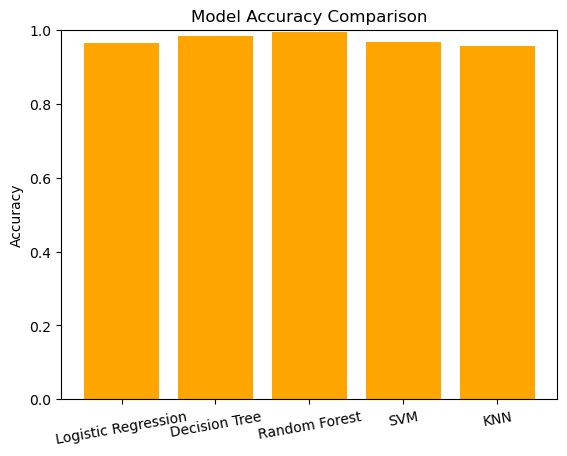

In [19]:
import matplotlib.pyplot as plt

plt.bar(accuracies.keys(), accuracies.values(), color='orange')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=10)
plt.ylim(0, 1)
plt.show()


In [20]:
import numpy as np
import joblib

# Save
joblib.dump(rf, 'crop_model.pkl')
joblib.dump(scaler, 'crop_scaler.pkl')
joblib.dump(le, 'crop_label_encoder.pkl')

# Load
loaded_model = joblib.load('crop_model.pkl')
loaded_scaler = joblib.load('crop_scaler.pkl')
loaded_encoder = joblib.load('crop_label_encoder.pkl')




In [21]:

example_data = np.array([[90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362]])
example_data_scaled = loaded_scaler.transform(example_data)
example_prediction = loaded_model.predict(example_data_scaled)

decoded_prediction = loaded_encoder.inverse_transform(example_prediction)
print(f'Example prediction: {decoded_prediction[0]}')

Example prediction: rice


c:\Users\BHARATH RC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
